In [7]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [8]:
Data = pd.read_csv(r"F:\PCA_100_features\PCA_100_features.csv")
Data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,231
0,25.022356,-6.799958,-5.016250,4.581315,-11.306539,4.426036,13.180123,2.459563,8.429075,-1.679232,...,0.034903,0.061404,0.009791,-0.142867,0.192382,-0.166419,-0.084624,0.019972,0.158908,0.0
1,-2.844736,-1.265252,1.738377,0.484612,0.022045,0.443640,-0.925560,-0.217946,0.753162,0.682743,...,0.053138,0.224744,-0.057990,-0.283643,0.214027,0.106258,-0.023617,0.158507,0.039491,0.0
2,-3.071476,-1.015506,2.156695,-2.202537,-4.595725,1.106969,-2.112005,-0.310945,3.380887,-1.529304,...,-0.063930,0.046628,0.094753,-0.041150,0.112519,-0.085224,0.137984,-0.081734,-0.139285,0.0
3,-4.920069,-1.329368,1.986788,-0.895050,2.066811,2.509160,-0.354943,0.878185,0.526922,1.098313,...,0.023651,0.008952,-0.080253,-0.154855,-0.031429,0.109931,0.060687,0.108340,-0.053775,0.0
4,0.770259,-1.559405,2.545578,-1.118795,0.540490,3.438093,-0.584477,-2.273167,-3.289307,-0.905880,...,0.114837,0.138084,0.059534,-0.037540,0.092255,-0.074577,-0.013786,-0.061695,0.213144,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,-7.751959,0.775206,-1.339623,-1.686491,1.232281,0.097654,0.221657,-0.863374,0.297561,-0.053956,...,-0.229244,-0.117494,0.024155,0.051106,0.164785,-0.069879,-0.000255,-0.040726,-0.149919,0.0
47872,-3.741647,-1.106958,-0.421251,-0.477359,0.693464,-0.077072,0.238473,1.366970,1.266009,-0.304988,...,-0.233906,0.002570,0.015502,0.033162,-0.083971,-0.002067,-0.058813,0.163790,0.092146,0.0
47873,-6.544203,1.804694,-1.886439,-1.361567,0.314316,-1.266477,-0.810861,0.313862,-1.334900,-0.490203,...,0.046927,0.206239,-0.090444,-0.301253,0.137316,-0.171041,0.093839,-0.083420,0.108726,0.0
47874,19.540495,16.103253,-7.299638,-4.989192,3.433336,3.265255,0.011561,-0.609568,-0.453411,0.539367,...,0.151006,0.106039,-0.064161,-0.003695,0.009459,0.108960,0.155346,0.019383,0.136804,0.0


In [9]:
Data.shape

(47876, 101)

## **Model Prepration**

# Brack Dataset

In [10]:
from sklearn.model_selection import train_test_split

X=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values

In [11]:
X.shape

(47876, 100)

In [12]:
y.shape

(47876,)

# Test and Train Dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
X_test.shape

(14363, 100)

In [15]:
print('X_Train set shape is',format(X_train.shape))
print('X_Test set shape is',format(X_test.shape))

X_Train set shape is (33513, 100)
X_Test set shape is (14363, 100)


In [16]:
print('Y_Train set shape is',format(y_train.shape))
print('Y_Test set shape is',format(y_test.shape))

Y_Train set shape is (33513,)
Y_Test set shape is (14363,)


In [17]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=20,)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.909737     0.709855  0.901083      0.809796      0.886333
recall         0.985772     0.262487  0.901083      0.624129      0.901083
f1-score       0.946230     0.383256  0.901083      0.664743      0.880312
support    29589.000000  3924.000000  0.901083  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29168   421]
 [ 2894  1030]]

Test Result:
Accuracy Score: 89.74%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.906907     0.701649  0.897375      0.804278      0.881998
recall         0.984231     0.268503  0.897375      0.626367      0.897375
f1-score       0.943988     0.388382  0.897375      0.666185      0.876564
support   

# Confusion Matrix

Confusion Matrix for Training

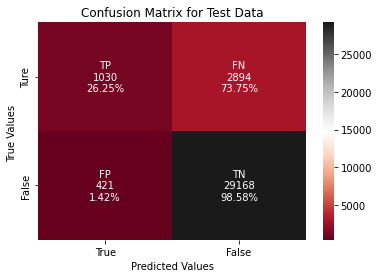

In [19]:
y_pred = lr_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

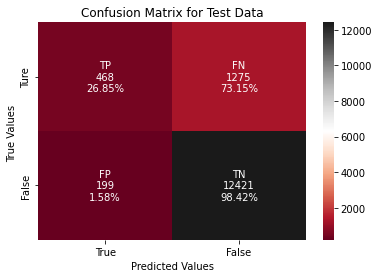

In [20]:
y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve 

Roc Curve for Training

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8514858712165021

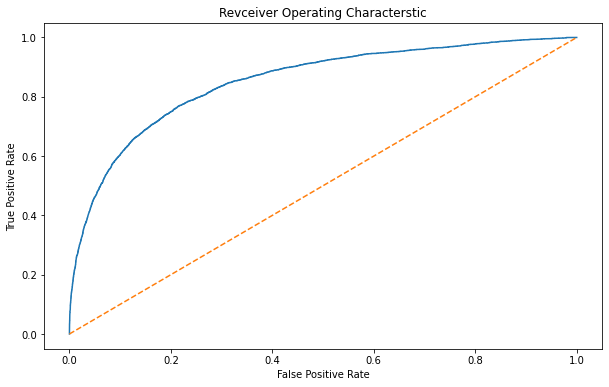

In [22]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8384411087865157

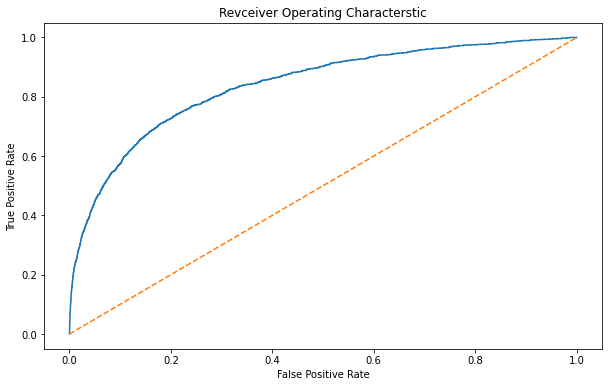

In [24]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [25]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["LogisticRegression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.73752


## 2. K-nearest neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.92%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.908976     0.915094   0.90917      0.912035      0.909692
recall         0.996958     0.247197   0.90917      0.622078      0.909170
f1-score       0.950936     0.389246   0.90917      0.670091      0.885169
support    29589.000000  3924.000000   0.90917  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29499    90]
 [ 2954   970]]

Test Result:
Accuracy Score: 90.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.903881     0.954976  0.905382      0.929428      0.910081
recall         0.998494     0.231211  0.905382      0.614853      0.905382
f1-score       0.948835     0.372286  0.905382      0.660561      0.878869
support   

# Confusion Matrix

Confusion Matrix for Training

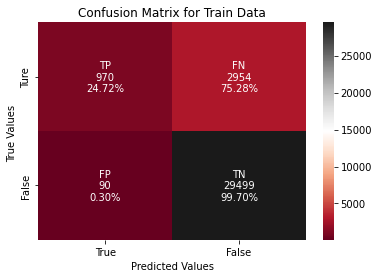

In [27]:
y_pred = knn_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

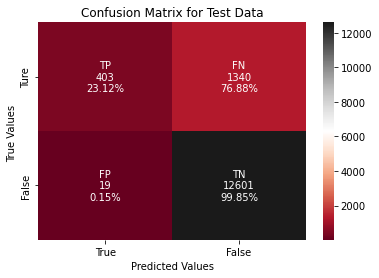

In [28]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve 

Roc Curve for Training

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9205163276817648

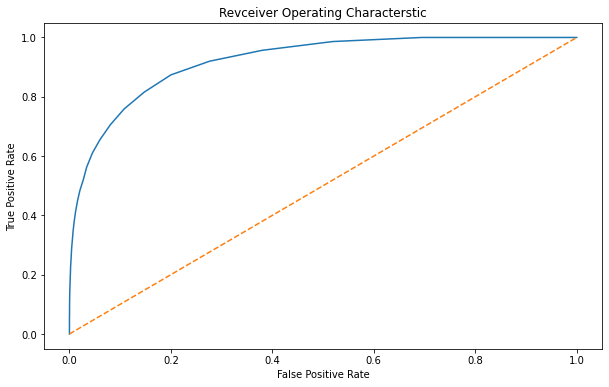

In [30]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8895274328011616

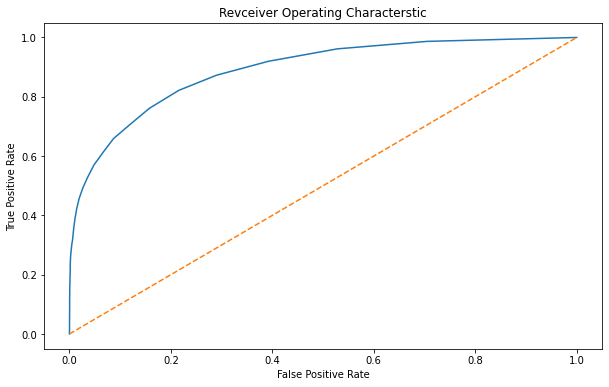

In [32]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

k-NN: Varying Number of Neighbors

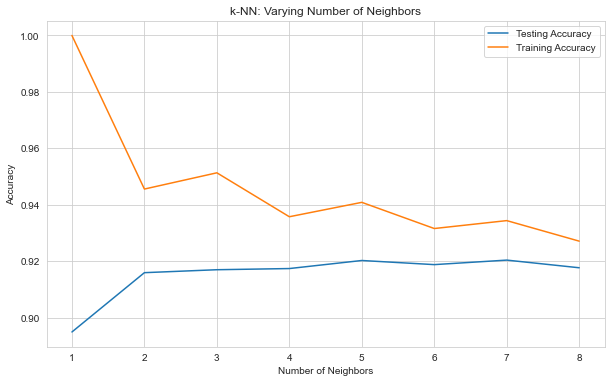

In [33]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\1715872608.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559


## 3. Support Vector machine

In [35]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.41%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.933253     0.947286  0.934055      0.940270      0.934896
recall         0.996587     0.462538  0.934055      0.729562      0.934055
f1-score       0.963881     0.621575  0.934055      0.792728      0.923800
support    29589.000000  3924.000000  0.934055  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29488   101]
 [ 2109  1815]]

Test Result:
Accuracy Score: 92.15%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.921267     0.926593  0.921534      0.923930      0.921913
recall         0.995800     0.383821  0.921534      0.689811      0.921534
f1-score       0.957085     0.542799  0.921534      0.749942      0.906810
support   

# Confusion Matrix

Confusion Matrix for Training 

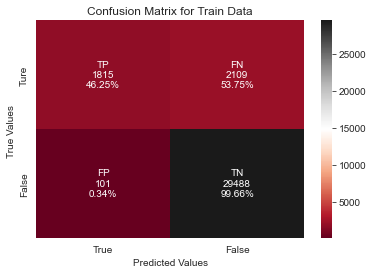

In [36]:
y_pred = svm_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

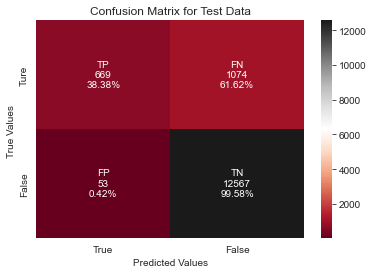

In [37]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.934899165113189

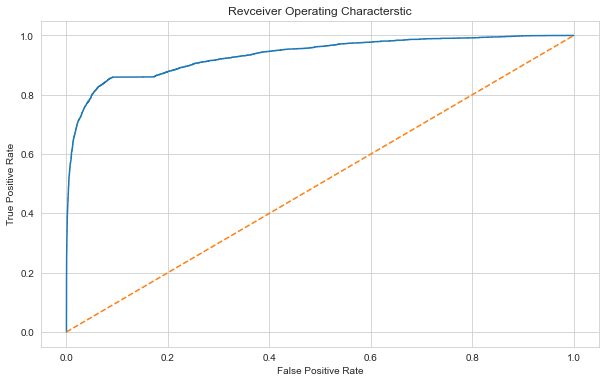

In [39]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.899033580552684

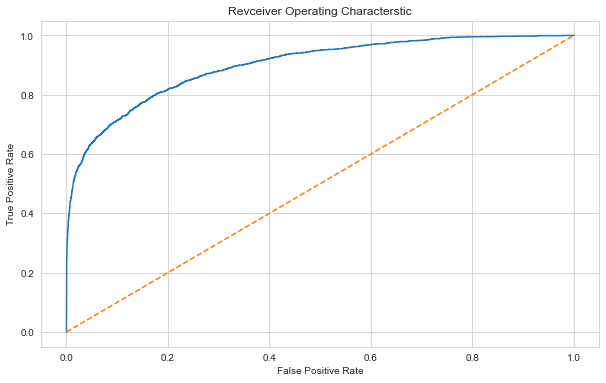

In [41]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\1471490544.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450


# 4. LGBMClassifier

In [43]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,) 
lgbmc_clf.fit(X_train, y_train)

print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=False)

[LightGBM] [Warning] Unknown parameter: int
Train Result:
Accuracy Score: 95.55%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.954042     0.972784   0.95548      0.963413      0.956236
recall         0.997634     0.637615   0.95548      0.817624      0.955480
f1-score       0.975351     0.770320   0.95548      0.872836      0.951344
support    29589.000000  3924.000000   0.95548  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29519    70]
 [ 1422  2502]]

Test Result:
Accuracy Score: 92.23%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.926011     0.864111    0.9223      0.895061      0.918499
recall         0.990729     0.426850    0.9223      0.708790      0.922300
f1-score       0.957277     0.571429    0

# Confusion Matrix

Confusion Matrix for Training

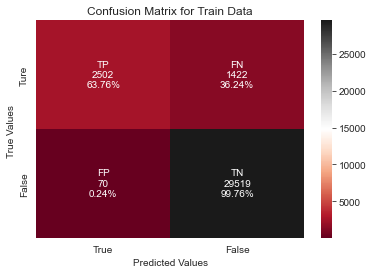

In [44]:
y_pred = lgbmc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

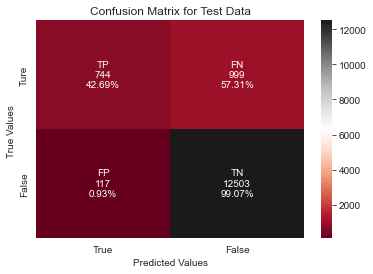

In [45]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9882695510898217

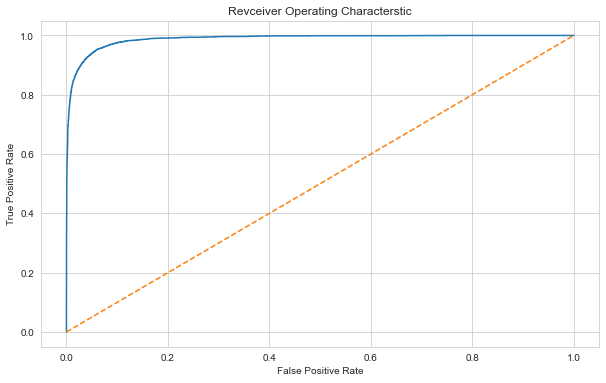

In [47]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9196097043823926

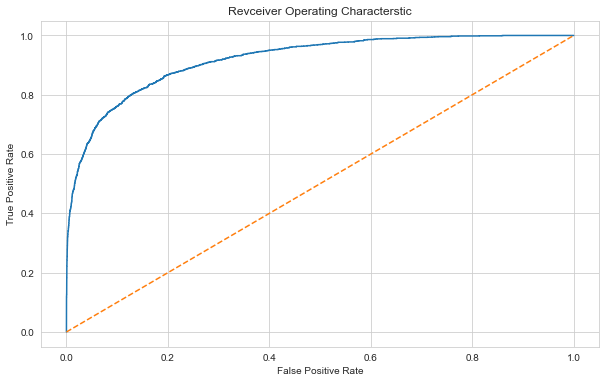

In [49]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [50]:
test_score = accuracy_score(y_test, lgbmc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lgbmc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LGBMClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\2900492383.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450
3,LGBMClassifier,95.547996,92.230036


## 5. Decision Tree Classifier 

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100,)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.908954     0.653772  0.897144      0.781363      0.879075
recall         0.981851     0.258410  0.897144      0.620131      0.897144
f1-score       0.943998     0.370411  0.897144      0.657204      0.876837
support    29589.000000  3924.000000  0.897144  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29052   537]
 [ 2910  1014]]

Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.899964     0.572531  0.885191      0.736247      0.860228
recall         0.978051     0.212851  0.885191      0.595451      0.885191
f1-score       0.937384     0.310330  0.885191      0.623857      0.861289
support   

# Confusion Matrix

Confusion Matrix for Training 

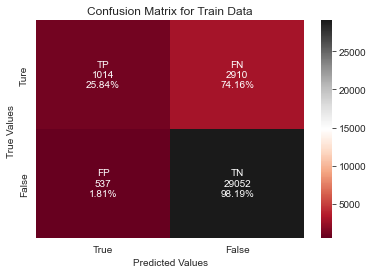

In [52]:
y_pred = tree_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

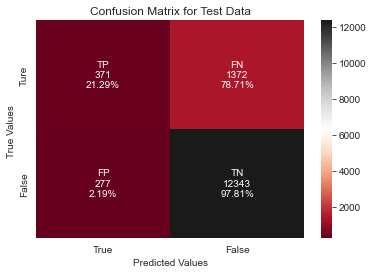

In [53]:
y_pred = tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8848837810590892

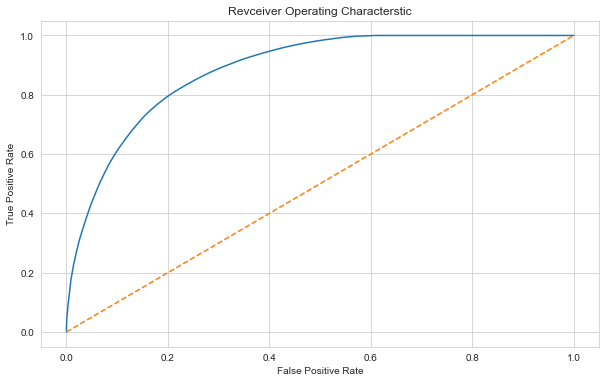

In [55]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7899585209754572

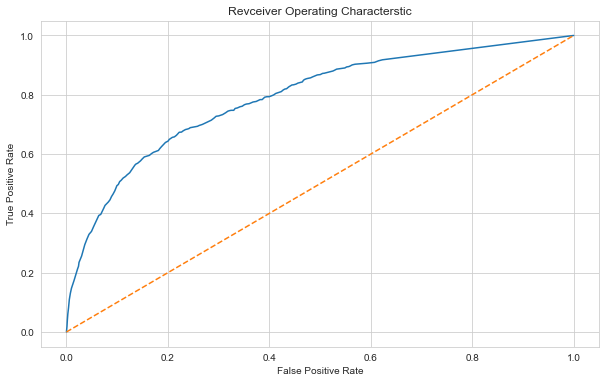

In [57]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [58]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\490717132.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450
3,LGBMClassifier,95.547996,92.230036
4,Decision Tree Classifier,89.714439,88.519112


## 6. Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=100,)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.884650     0.985075  0.884851      0.934862      0.896409
recall         0.999966     0.016820  0.884851      0.508393      0.884851
f1-score       0.938780     0.033074  0.884851      0.485927      0.832732
support    29589.000000  3924.000000  0.884851  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29588     1]
 [ 3858    66]]

Test Result:
Accuracy Score: 87.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.879749     1.000000    0.8799      0.939875      0.894342
recall         1.000000     0.010327    0.8799      0.505164      0.879900
f1-score       0.936028     0.020443    0.8799      0.478236      0.824919
support   

# Confusion Matrix

Confusion Matrix for Training

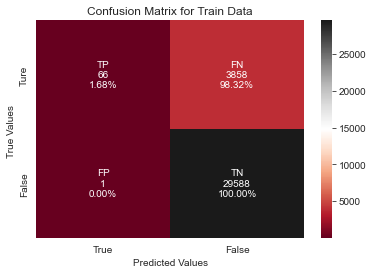

In [60]:
y_pred = rf_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

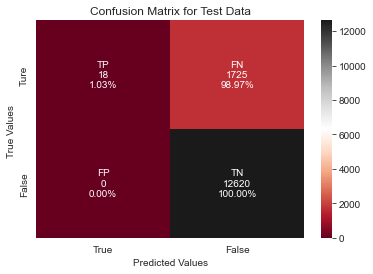

In [61]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9392312895985224

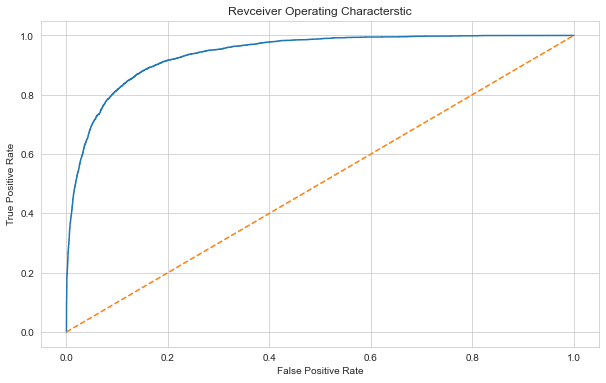

In [63]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8828219375123314

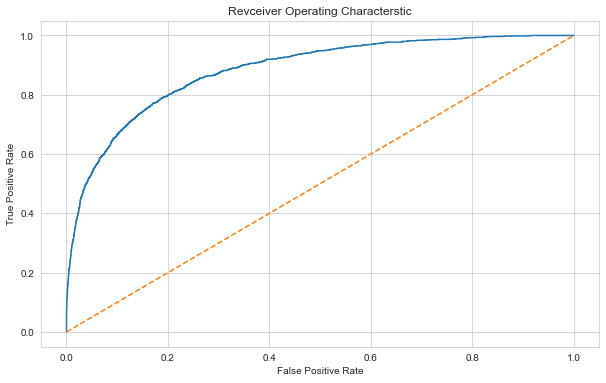

In [65]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [66]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\2869621319.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450
3,LGBMClassifier,95.547996,92.230036
4,Decision Tree Classifier,89.714439,88.519112
5,Random Forest Classifier,88.485065,87.989974


## 7. XGBoost Classifer

In [67]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 99.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.995055     0.997359  0.995315      0.996207      0.995325
recall         0.999662     0.962538  0.995315      0.981100      0.995315
f1-score       0.997353     0.979639  0.995315      0.988496      0.995279
support    29589.000000  3924.000000  0.995315  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29579    10]
 [  147  3777]]

Test Result:
Accuracy Score: 92.55%
_______________________________________________
CLASSIFICATION REPORT:


# Confusion Matrix

Confusion Matrix for Training

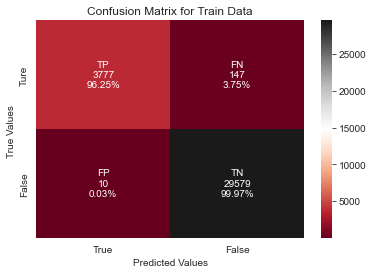

In [68]:
y_pred = xgb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

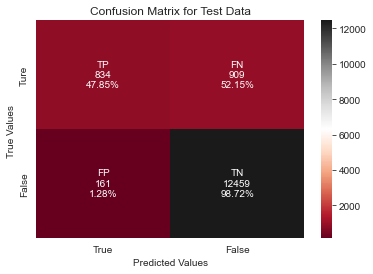

In [69]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9998714205891526

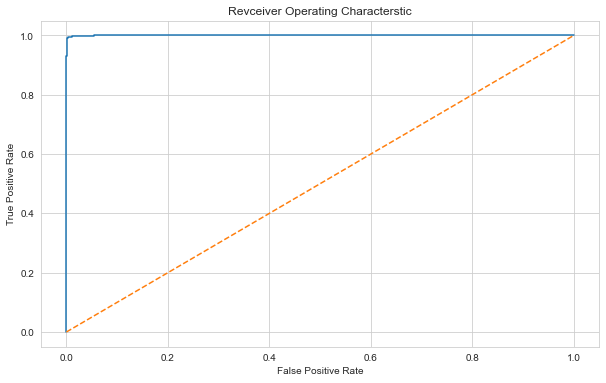

In [71]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.919849786285736

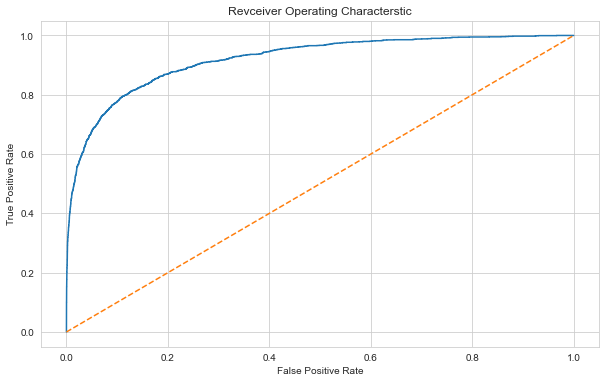

In [73]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [74]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\3415439063.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450
3,LGBMClassifier,95.547996,92.230036
4,Decision Tree Classifier,89.714439,88.519112
5,Random Forest Classifier,88.485065,87.989974
6,XGBoost Classifier,99.531525,92.550303


# 8. AdaBoostClassifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=20,)
ab_clf.fit(X_train, y_train)

print_score(ab_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ab_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.898231     0.637122  0.890759      0.767676      0.867658
recall         0.988239     0.155708  0.890759      0.571974      0.890759
f1-score       0.941087     0.250256  0.890759      0.595672      0.860199
support    29589.000000  3924.000000  0.890759  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29241   348]
 [ 3313   611]]

Test Result:
Accuracy Score: 88.75%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.893056     0.673973  0.887489      0.783514      0.866470
recall         0.990571     0.141136  0.887489      0.565853      0.887489
f1-score       0.939289     0.233397  0.887489      0.586343      0.853627
support   

# Confusion Matrix

Confusion Matrix for Training

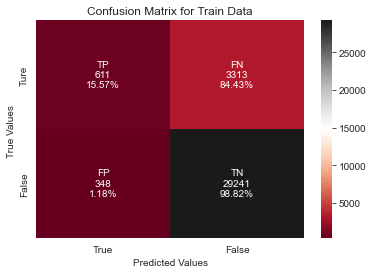

In [76]:
y_pred = ab_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

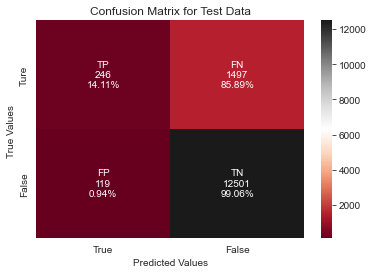

In [77]:
y_pred = ab_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8090792980378931

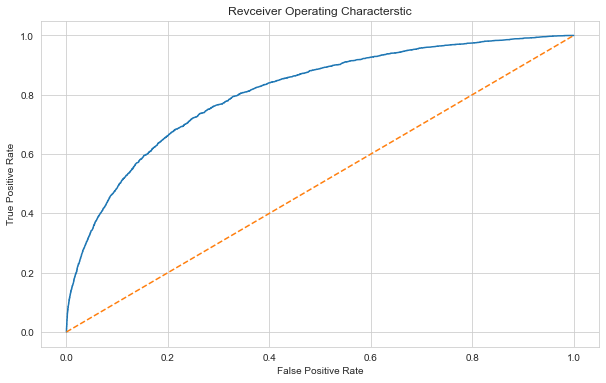

In [79]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7876065957286242

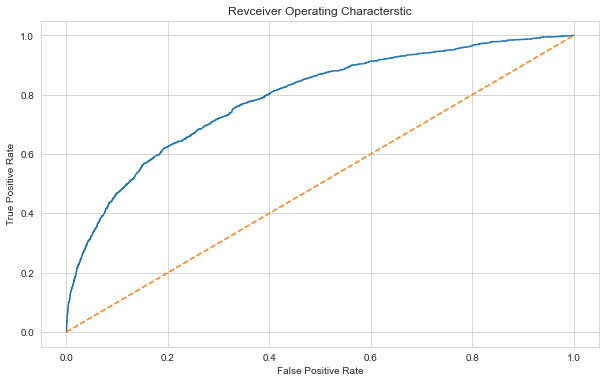

In [81]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [82]:
test_score = accuracy_score(y_test, ab_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ab_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["AdaBoostClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\2629595934.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450
3,LGBMClassifier,95.547996,92.230036
4,Decision Tree Classifier,89.714439,88.519112
5,Random Forest Classifier,88.485065,87.989974
6,XGBoost Classifier,99.531525,92.550303
7,AdaBoostClassifier,89.075881,88.748869


# 9. GradientBoostingClassifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train, y_train)

print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.911329     0.919721  0.911616      0.915525      0.912312
recall         0.996891     0.268603  0.911616      0.632747      0.911616
f1-score       0.952192     0.415779  0.911616      0.683985      0.889384
support    29589.000000  3924.000000  0.911616  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29497    92]
 [ 2870  1054]]

Test Result:
Accuracy Score: 90.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.903325     0.902273  0.903293      0.902799      0.903198
recall         0.996593     0.227768  0.903293      0.612180      0.903293
f1-score       0.947670     0.363720  0.903293      0.655695      0.876805
support   

# Confusion Matrix

Confusion Matrix for Training

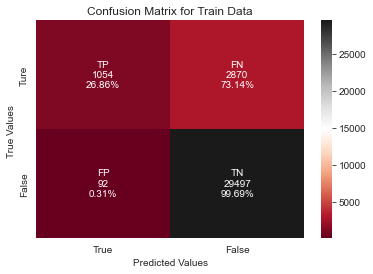

In [84]:
y_pred = gb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

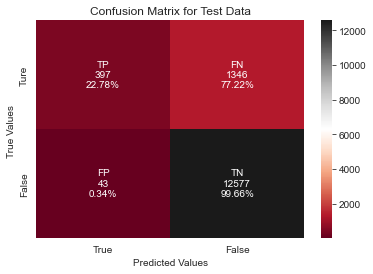

In [85]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9125037392157023

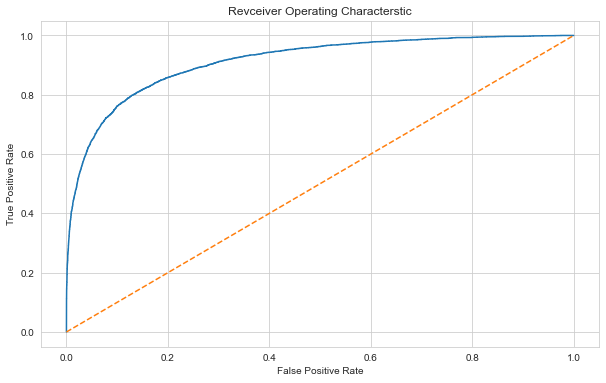

In [87]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8768514856346372

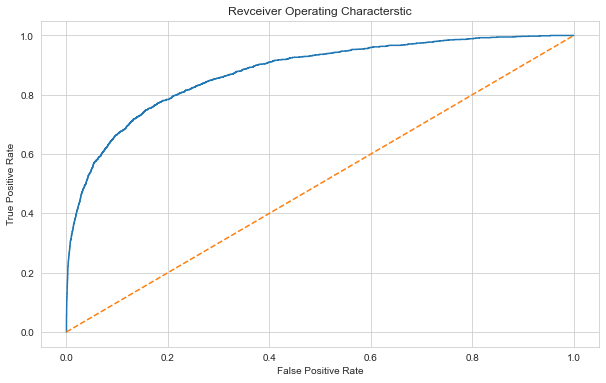

In [89]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [90]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GradientBoostingClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\646985266.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450
3,LGBMClassifier,95.547996,92.230036
4,Decision Tree Classifier,89.714439,88.519112
5,Random Forest Classifier,88.485065,87.989974
6,XGBoost Classifier,99.531525,92.550303
7,AdaBoostClassifier,89.075881,88.748869
8,GradientBoostingClassifier,91.161639,90.329318


# 10. ExtraTreesClassifier

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
etc_clf = ExtraTreesClassifier(n_estimators=100,max_depth=10)
etc_clf.fit(X_train, y_train)

print_score(etc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(etc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.34%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.883333     1.000000  0.883389      0.941666      0.896993
recall         1.000000     0.004077  0.883389      0.502039      0.883389
f1-score       0.938053     0.008122  0.883389      0.473087      0.829168
support    29589.000000  3924.000000  0.883389  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29589     0]
 [ 3908    16]]

Test Result:
Accuracy Score: 87.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0     1.0  accuracy     macro avg  weighted avg
precision      0.878647     0.0  0.878647      0.439323      0.772020
recall         1.000000     0.0  0.878647      0.500000      0.878647
f1-score       0.935404     0.0  0.878647      0.467702      0.821889
support    12620.000000  1743.

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Confusion Matrix

Confusion Matrix for Training

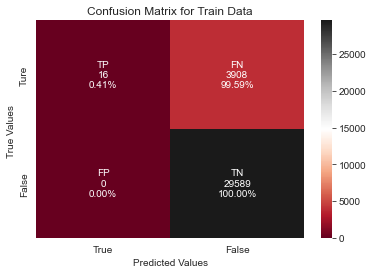

In [92]:
y_pred = etc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

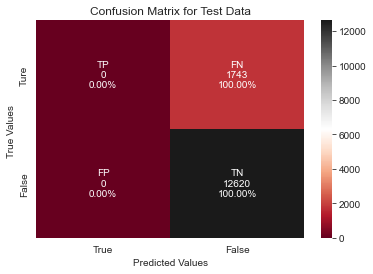

In [93]:
y_pred = etc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9562227973457227

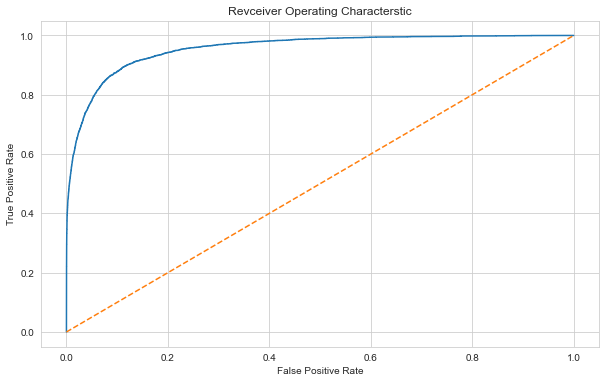

In [95]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.876608948813138

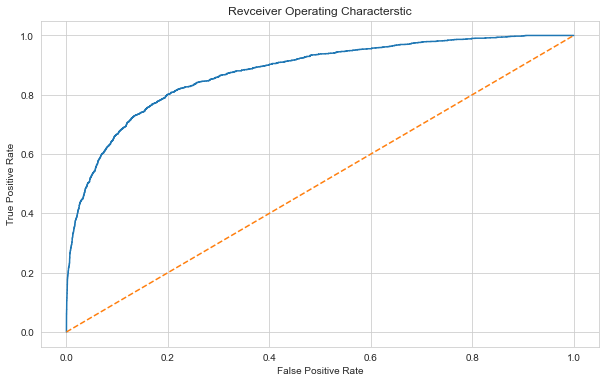

In [97]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [98]:
test_score = accuracy_score(y_test, etc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, etc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["ExtraTreesClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\1027888236.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450
3,LGBMClassifier,95.547996,92.230036
4,Decision Tree Classifier,89.714439,88.519112
5,Random Forest Classifier,88.485065,87.989974
6,XGBoost Classifier,99.531525,92.550303
7,AdaBoostClassifier,89.075881,88.748869
8,GradientBoostingClassifier,91.161639,90.329318
9,ExtraTreesClassifier,88.338854,87.864652


# 11. CatBoostClassifier

In [99]:
from catboost import CatBoostClassifier
cbc_clf = CatBoostClassifier(n_estimators=10)
cbc_clf.fit(X_train, y_train)

print_score(cbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cbc_clf, X_train, y_train, X_test, y_test, train=False)

Learning rate set to 0.5
0:	learn: 0.4093570	total: 294ms	remaining: 2.65s
1:	learn: 0.3383717	total: 386ms	remaining: 1.54s
2:	learn: 0.3146770	total: 424ms	remaining: 990ms
3:	learn: 0.3010791	total: 465ms	remaining: 697ms
4:	learn: 0.2899252	total: 505ms	remaining: 505ms
5:	learn: 0.2789132	total: 556ms	remaining: 371ms
6:	learn: 0.2712777	total: 595ms	remaining: 255ms
7:	learn: 0.2626189	total: 665ms	remaining: 166ms
8:	learn: 0.2562699	total: 710ms	remaining: 78.9ms
9:	learn: 0.2503012	total: 758ms	remaining: 0us
Train Result:
Accuracy Score: 90.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.905854     0.871587  0.904843      0.888721      0.901842
recall         0.995708     0.219674  0.904843      0.607691      0.904843
f1-score       0.948658     0.350906  0.904843      0.649782      0.878668
support    29589.000000  3924.000000  0.904843  33513.000000  33513.

# Confusion Matrix

Confusion Matrix for Training

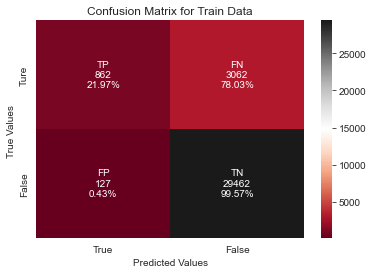

In [100]:
y_pred = cbc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

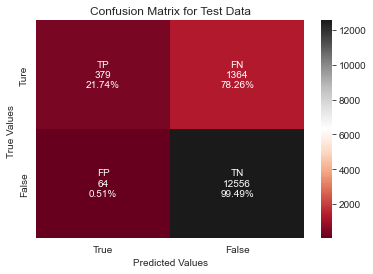

In [101]:
y_pred = cbc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8725051081226324

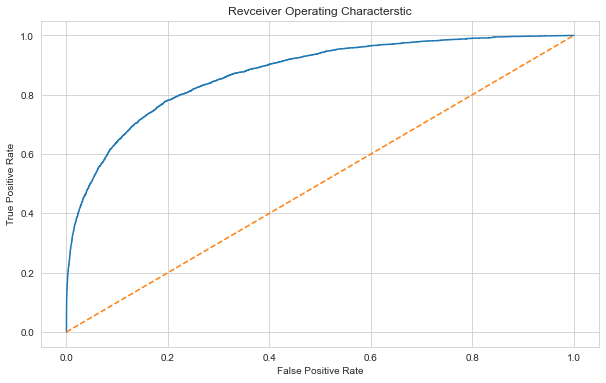

In [103]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8425587793783239

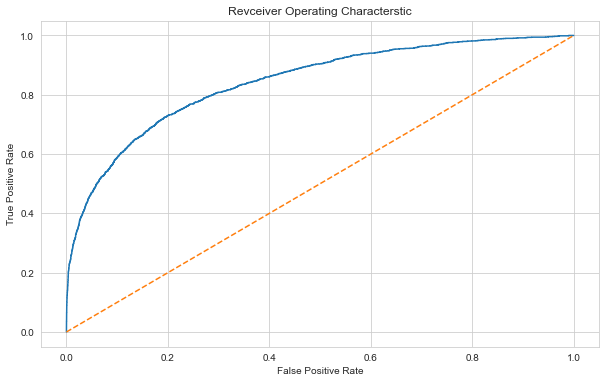

In [105]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [106]:
test_score = accuracy_score(y_test, cbc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, cbc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["CatBoostClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_3264\292123774.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,90.108316,89.737520
1,K-nearest neighbors,92.707308,91.763559
2,Support Vector Machine,93.405544,92.153450
3,LGBMClassifier,95.547996,92.230036
4,Decision Tree Classifier,89.714439,88.519112
5,Random Forest Classifier,88.485065,87.989974
6,XGBoost Classifier,99.531525,92.550303
7,AdaBoostClassifier,89.075881,88.748869
8,GradientBoostingClassifier,91.161639,90.329318
9,ExtraTreesClassifier,88.338854,87.864652


# **Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree**

In [107]:
from sklearn.metrics import auc

auc_lr=auc(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
auc_knn=auc(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
auc_svm=auc(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
auc_lgbmc=auc(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
auc_tree=auc(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
auc_rf=auc(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
auc_xgb=auc(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
auc_ab=auc(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
auc_gb=auc(false_positive_rate_gb_clf,true_positive_rate_gb_clf)
auc_etc=auc(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
auc_cbc=auc(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)

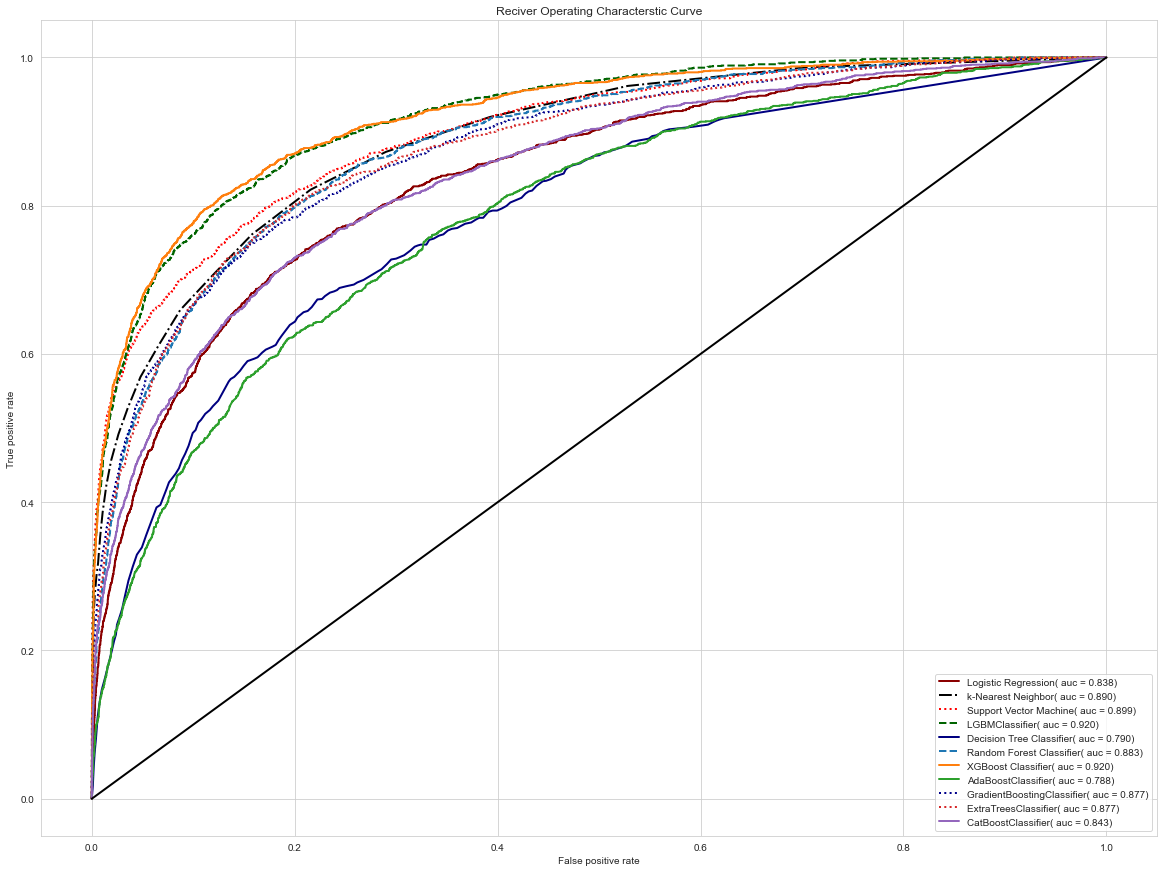

In [108]:
#Plot All ROC Curve`s

sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,linewidth=2,color="darkred",linestyle='-',label='Logistic Regression( auc = %0.3f)' % auc_lr)
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,linewidth=2,color="black",linestyle='-.',label='k-Nearest Neighbor( auc = %0.3f)' % auc_knn)
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,linewidth=2,color="red",linestyle=':',label='Support Vector Machine( auc = %0.3f)' % auc_svm)
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,linewidth=2,color="darkgreen",linestyle='dashed',label='LGBMClassifier( auc = %0.3f)' % auc_lgbmc)
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,linewidth=2,color="navy",linestyle='solid',label='Decision Tree Classifier( auc = %0.3f)' % auc_tree)
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,linewidth=2,linestyle='--',label='Random Forest Classifier( auc = %0.3f)' % auc_rf)
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,linewidth=2,linestyle='-',label='XGBoost Classifier( auc = %0.3f)' % auc_xgb)
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf,linewidth=2,linestyle='-',label='AdaBoostClassifier( auc = %0.3f)' % auc_ab)
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf,linewidth=2,color="darkblue",linestyle='dotted',label='GradientBoostingClassifier( auc = %0.3f)' % auc_gb)
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf,linewidth=2,linestyle=':',label='ExtraTreesClassifier( auc = %0.3f)' % auc_etc)
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,linewidth=2,linestyle='solid',label='CatBoostClassifier( auc = %0.3f)' % auc_cbc)

plt.plot([0,1],linewidth=2,color="black",linestyle='-')
#plt.plot([0,0],[1,0],c='.1')
#plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()